In [6]:
url = "/Users/romerocruzsa/Workspace/Projects/Personal/romerocruzsa.github.io/assets/favicon.png"

%inline matplotlib

UsageError: Line magic function `%inline` not found.


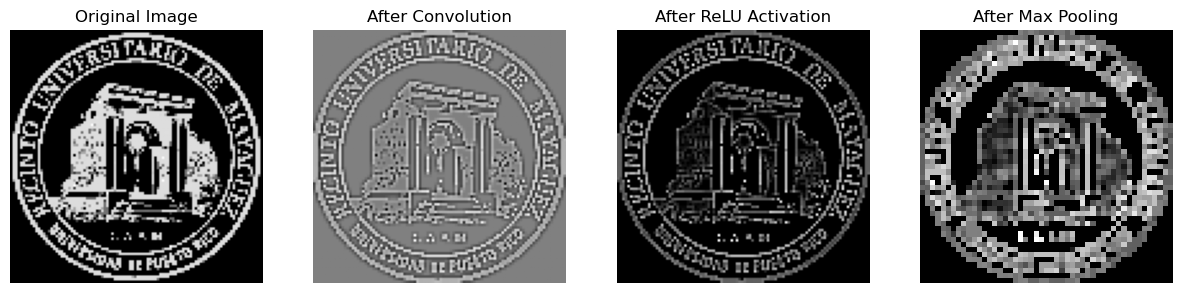

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.signal import convolve2d

# Load and preprocess the image
def load_image():
    image = cv2.imread(url)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    image = cv2.resize(image, (100, 100))  # Resize for better visualization
    return image

# Define a sample convolution filter (Edge Detection)
filter_kernel = np.array([[-1, -1, -1],
                           [-1,  8, -1],
                           [-1, -1, -1]])

def apply_convolution(image, kernel):
    return convolve2d(image, kernel, mode='valid')

def relu_activation(feature_map):
    return np.maximum(0, feature_map)

def max_pooling(feature_map, size=2, stride=2):
    output_shape = ((feature_map.shape[0] - size) // stride + 1, 
                    (feature_map.shape[1] - size) // stride + 1)
    pooled = np.zeros(output_shape)
    for i in range(0, output_shape[0]):
        for j in range(0, output_shape[1]):
            pooled[i, j] = np.max(feature_map[i*stride:i*stride+size, j*stride:j*stride+size])
    return pooled

# Load image
image = load_image()

# Apply convolution
conv_output = apply_convolution(image, filter_kernel)

# Apply ReLU
relu_output = relu_activation(conv_output)

# Apply Max Pooling
pooled_output = max_pooling(relu_output)

# Plot the results
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")

axes[1].imshow(conv_output, cmap='gray')
axes[1].set_title("After Convolution")

axes[2].imshow(relu_output, cmap='gray')
axes[2].set_title("After ReLU Activation")

axes[3].imshow(pooled_output, cmap='gray')
axes[3].set_title("After Max Pooling")

for ax in axes:
    ax.axis("off")

plt.show()

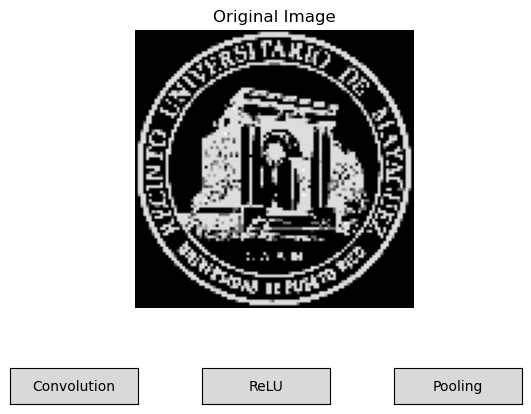

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
from scipy.signal import convolve2d

# Load and preprocess the image
def load_image():
    image = cv2.imread(url)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    image = cv2.resize(image, (100, 100))  # Resize for better visualization
    return image

# Define a sample convolution filter (Edge Detection)
filter_kernel = np.array([[-1, -1, -1],
                           [-1,  8, -1],
                           [-1, -1, -1]])

def apply_convolution(image, kernel):
    return convolve2d(image, kernel, mode='valid')

def relu_activation(feature_map):
    return np.maximum(0, feature_map)

def max_pooling(feature_map, size=2, stride=2):
    output_shape = ((feature_map.shape[0] - size) // stride + 1, 
                    (feature_map.shape[1] - size) // stride + 1)
    pooled = np.zeros(output_shape)
    for i in range(0, output_shape[0]):
        for j in range(0, output_shape[1]):
            pooled[i, j] = np.max(feature_map[i*stride:i*stride+size, j*stride:j*stride+size])
    return pooled

# Load image
image = load_image()

# Create interactive figure
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.3)
ax.imshow(image, cmap='gray')
ax.set_title("Original Image")
ax.axis("off")

# Define button actions
def update_convolution(event):
    ax.imshow(apply_convolution(image, filter_kernel), cmap='gray')
    ax.set_title("After Convolution")
    plt.draw()

def update_relu(event):
    conv_output = apply_convolution(image, filter_kernel)
    ax.imshow(relu_activation(conv_output), cmap='gray')
    ax.set_title("After ReLU Activation")
    plt.draw()

def update_pooling(event):
    conv_output = apply_convolution(image, filter_kernel)
    relu_output = relu_activation(conv_output)
    ax.imshow(max_pooling(relu_output), cmap='gray')
    ax.set_title("After Max Pooling")
    plt.draw()

# Create buttons
ax_convolution = plt.axes([0.1, 0.1, 0.2, 0.075])
ax_relu = plt.axes([0.4, 0.1, 0.2, 0.075])
ax_pooling = plt.axes([0.7, 0.1, 0.2, 0.075])

btn_convolution = widgets.Button(ax_convolution, "Convolution")
btn_relu = widgets.Button(ax_relu, "ReLU")
btn_pooling = widgets.Button(ax_pooling, "Pooling")

btn_convolution.on_clicked(update_convolution)
btn_relu.on_clicked(update_relu)
btn_pooling.on_clicked(update_pooling)

plt.show()